Classify characters from Dragon Ball: Kid Goku, Krillin and Tien shinhan

This model is trained using a CNN and images downloaded from Google Images

At first the model is trained and predicts the characters with accuracy of around 69%. It is then retrained using earlystopping, increased filter and kernel sizes on hidden layers and adds dropout layers to minimise the loss function. This improves performance by around 6% to give an accuracy of 75%.

Finally, the model is tested with some screenshots I took from the anime series and correctly classifies them.



In [374]:
from tensorflow.keras.callbacks import TensorBoard
import time
import os

current_time = int(time.time())
model_name = f"dragon-ball-classifier-{current_time}"


In [375]:
tensorboard = TensorBoard(log_dir=f'logs\\{model_name}',profile_batch = 100000000)

In [376]:
import matplotlib.pyplot as plt
import glob
#resize to put into model
from skimage.transform import resize

characters = ["kid goku", "krillin", "tienshinhan"] #'piccolo', 
training_data = []

def get_image_data():
    for char in characters:
        for i in glob.glob(f"{char}/*"):
            training_data.append([resize(plt.imread(i), (32,32,3)),characters.index(char)])

get_image_data()

import random

random.shuffle(training_data)

len(training_data)

276

In [377]:
import numpy as np

X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.asarray(X)

In [378]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [379]:
#convert labels to set of 3 numbers to input into neural net
#one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

y_train_one_hot[0]

array([0., 1., 0.], dtype=float32)

In [380]:
print(y_train_one_hot)

[[0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0.

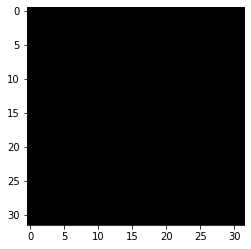

In [416]:
#krillin is showing as label 0 in the one hot encoding (index 0) above as expected
plt.imshow(X_train[0])

In [382]:
#normalise data (pixels in images) to be ~[0,1]
#pixels are 0-255, so just % 255
import numpy as np

X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

X_train = X_train/255
X_test = X_test/255

X_train

array([[[[0.00174855, 0.00244233, 0.00308727],
         [0.00150177, 0.002288  , 0.00301903],
         [0.00157337, 0.0023491 , 0.00306138],
         ...,
         [0.00172728, 0.0025337 , 0.00317666],
         [0.00182238, 0.00258308, 0.00319204],
         [0.00197328, 0.00266995, 0.00319877]],

        [[0.00175744, 0.00247116, 0.00314302],
         [0.00213283, 0.00269446, 0.00332372],
         [0.00254421, 0.00296713, 0.00343444],
         ...,
         [0.00190215, 0.0027305 , 0.00325452],
         [0.00186497, 0.00267013, 0.00320454],
         [0.00200157, 0.00273164, 0.00322226]],

        [[0.00161663, 0.00242022, 0.00310259],
         [0.00190888, 0.0026017 , 0.00324316],
         [0.00239139, 0.00285305, 0.00337755],
         ...,
         [0.00226193, 0.00305748, 0.00343906],
         [0.00210111, 0.00288543, 0.00332198],
         [0.00212803, 0.00285083, 0.00327855]],

        ...,

        [[0.00262874, 0.00306036, 0.00141382],
         [0.00263552, 0.00307862, 0.00140523]

In [383]:
#build CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [384]:
model = Sequential()

In [385]:
#img size is quite large so try 5x5 kernal size to learn larger features
model.add( Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))

In [386]:
#maxpooling layer
model.add( MaxPooling2D(pool_size=(2,2))) #max element from convolved features in previous layer

In [387]:
model.add( Conv2D(32,(5,5),activation='relu')) #not first layer, so we dont need shape

In [388]:
model.add( MaxPooling2D(pool_size=(2,2)))

In [389]:
X_train.shape

(220, 32, 32, 3)

In [390]:
#flatten layer (convert to 1d array)
model.add( Flatten() )
model.add(Dense(220, activation='relu')) #220 training imgs so lets try 220 neurons
model.add(Dense(3,activation='softmax')) #3 labels so do 3 neurons for output

In [391]:
#use categorical_crossentropy as classes > 2

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [392]:
#train the model
hist = model.fit(X_train, y_train_one_hot, batch_size=10, epochs=20, validation_split=0.1, callbacks=[tensorboard])

Train on 198 samples, validate on 22 samples
Epoch 1/20
198/198 [==============================] - 5s 26ms/sample - loss: 1.1009 - accuracy: 0.3283 - val_loss: 1.0979 - val_accuracy: 0.3636
Epoch 2/20
198/198 [==============================] - 1s 4ms/sample - loss: 1.0972 - accuracy: 0.3687 - val_loss: 1.0983 - val_accuracy: 0.3182
Epoch 3/20
198/198 [==============================] - 1s 6ms/sample - loss: 1.0960 - accuracy: 0.3737 - val_loss: 1.0990 - val_accuracy: 0.3182
Epoch 4/20
198/198 [==============================] - 1s 4ms/sample - loss: 1.0960 - accuracy: 0.3737 - val_loss: 1.0994 - val_accuracy: 0.3182
Epoch 5/20
198/198 [==============================] - 1s 4ms/sample - loss: 1.0940 - accuracy: 0.3737 - val_loss: 1.0980 - val_accuracy: 0.3182
Epoch 6/20
198/198 [==============================] - 1s 4ms/sample - loss: 1.0947 - accuracy: 0.3737 - val_loss: 1.0944 - val_accuracy: 0.3182
Epoch 7/20
198/198 [==============================] - 1s 5ms/sample - loss: 1.0834 - accur

In [393]:
#get model accuracy - 63%, not bad
model.evaluate(X_test, y_test_one_hot)[1]

56/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.625

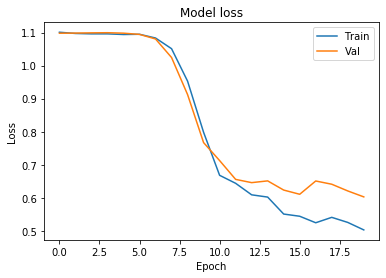

In [394]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [395]:
model.save('dragon-ball-classifier-1.h5')

In [411]:
#doubling filters and increasing kernal size on second conv layer and adding earlystopping
model = Sequential()
model.add( Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add( MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(64,(7,7),activation='relu'))
model.add( MaxPooling2D(pool_size=(2,2)))

model.add( Flatten() )
model.add(Dense(220, activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [412]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25) #we want to min loss

hist = model.fit(X_train, y_train_one_hot, batch_size=10, epochs=50, validation_split=0.1, callbacks=[early_stop])

Train on 198 samples, validate on 22 samples
Epoch 1/50
198/198 [==============================] - 4s 19ms/sample - loss: 1.0994 - accuracy: 0.3737 - val_loss: 1.0991 - val_accuracy: 0.3182
Epoch 2/50
198/198 [==============================] - 2s 11ms/sample - loss: 1.0970 - accuracy: 0.3737 - val_loss: 1.0994 - val_accuracy: 0.3182
Epoch 3/50
198/198 [==============================] - 3s 14ms/sample - loss: 1.0939 - accuracy: 0.3737 - val_loss: 1.0966 - val_accuracy: 0.3182
Epoch 4/50
198/198 [==============================] - 2s 8ms/sample - loss: 1.0765 - accuracy: 0.3737 - val_loss: 1.0680 - val_accuracy: 0.3182
Epoch 5/50
198/198 [==============================] - 2s 8ms/sample - loss: 1.0184 - accuracy: 0.4192 - val_loss: 0.9694 - val_accuracy: 0.5909
Epoch 6/50
198/198 [==============================] - 2s 9ms/sample - loss: 0.8616 - accuracy: 0.6768 - val_loss: 0.8066 - val_accuracy: 0.5909
Epoch 7/50
198/198 [==============================] - 2s 9ms/sample - loss: 0.7094 - acc

In [413]:
# 71% accuracy - much better
model.evaluate(X_test, y_test_one_hot)[1]

56/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.71428573

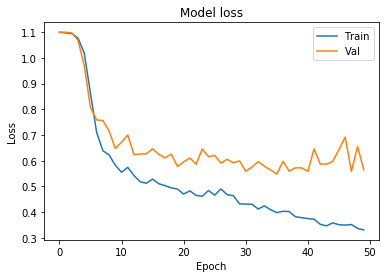

In [414]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [415]:
model.save('dragon-ball-classifier-2.h5')

In [417]:
from tensorflow.keras.layers import Dropout

#adding dropouts
model = Sequential()
model.add( Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=(32,32,3)))
model.add( MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))
model.add( Conv2D(64,kernel_size=(7,7),activation='relu'))
model.add( MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add( Flatten() )
model.add(Dense(220, activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [418]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25) #we want to min loss

hist = model.fit(X_train, y_train_one_hot, batch_size=10, epochs=50, validation_split=0.1, callbacks=[early_stop])

Train on 198 samples, validate on 22 samples
Epoch 1/50
198/198 [==============================] - 4s 23ms/sample - loss: 1.1008 - accuracy: 0.2879 - val_loss: 1.0990 - val_accuracy: 0.3182
Epoch 2/50
198/198 [==============================] - 2s 10ms/sample - loss: 1.0971 - accuracy: 0.3737 - val_loss: 1.0993 - val_accuracy: 0.3182
Epoch 3/50
198/198 [==============================] - 1s 7ms/sample - loss: 1.0955 - accuracy: 0.3737 - val_loss: 1.1005 - val_accuracy: 0.3182
Epoch 4/50
198/198 [==============================] - 1s 7ms/sample - loss: 1.0943 - accuracy: 0.3737 - val_loss: 1.0999 - val_accuracy: 0.3182
Epoch 5/50
198/198 [==============================] - 2s 9ms/sample - loss: 1.0871 - accuracy: 0.3737 - val_loss: 1.0883 - val_accuracy: 0.3182
Epoch 6/50
198/198 [==============================] - 2s 10ms/sample - loss: 1.0637 - accuracy: 0.3737 - val_loss: 1.0823 - val_accuracy: 0.3182
Epoch 7/50
198/198 [==============================] - 2s 9ms/sample - loss: 1.0069 - acc

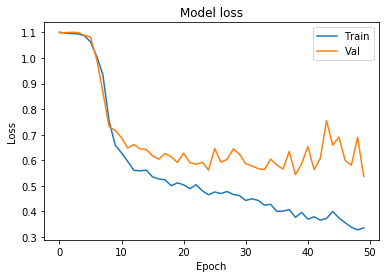

In [419]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [420]:
#73% - squeezed out another 2%
model.evaluate(X_test, y_test_one_hot)[1]

56/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.73214287

In [429]:
model.save('dragon-ball-classifier-3.h5')

In [430]:
from tensorflow.keras.models import load_model

model = load_model('dragon-ball-classifier-3.h5')

In [431]:
predictions = model.predict_classes(X_test)

In [432]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,predictions))

print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        11
           1       0.78      0.69      0.73        26
           2       0.65      0.68      0.67        19

    accuracy                           0.71        56
   macro avg       0.71      0.73      0.72        56
weighted avg       0.72      0.71      0.71        56

[[ 9  1  1]
 [ 2 18  6]
 [ 2  4 13]]


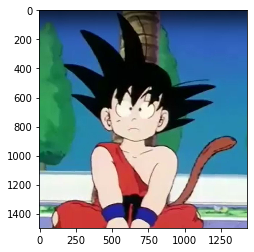

In [433]:
#testing the model using screenshots i took from the anime

kid_goku_test_read = plt.imread('kid_goku_test2.JPG')
kid_goku_test = plt.imshow(kid_goku_test_read)
kg_resized = resize(kid_goku_test_read, (32,32,3))

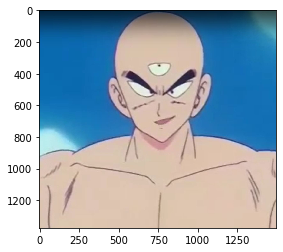

In [434]:
tienshinhan_test_read = plt.imread('tienshinhan_test.JPG')
tienshinhan_test = plt.imshow(tienshinhan_test_read)
tsh_resized = resize(tienshinhan_test_read, (32,32,3))

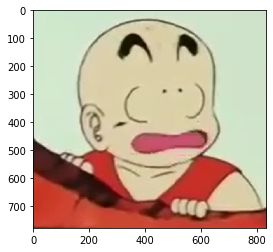

In [435]:
krillin_test_read = plt.imread('krillin_test.PNG')
krillin_test = plt.imshow(krillin_test_read)
krillin_resized = resize(krillin_test_read, (32,32,3))

In [436]:
#get probabilities of each class
import numpy as np

probs = [model.predict(np.array([test,])) for test in [kg_resized,tsh_resized,krillin_resized]]

In [437]:
probs

[array([[1., 0., 0.]], dtype=float32),
 array([[0., 0., 1.]], dtype=float32),
 array([[5.076258e-27, 1.000000e+00, 6.833489e-14]], dtype=float32)]

In [295]:
classes = characters

classes

['kid goku', 'krillin', 'tienshinhan']

In [ ]:
#The model gets all 2 of 3 tests correct:
#Our first test predicts tienshinhan, second predicts tenshinhan and third predicts krillin